In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from matplotlib.colors import ListedColormap

In [3]:
zoo_data = pd.read_csv("Zoo.csv")
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
# The 'animal name' column is an identifier, not a feature for classification.
# We will save it for later interpretation but drop it from the feature set.
animal_names = zoo_data['animal name']
df = zoo_data.drop('animal name', axis=1)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
# Separate features (X) and target (y)
# Features are all the animal characteristics (hair, feathers, eggs, etc.)
X = df.drop('type', axis=1)
# Target is the animal type (1=mammal, 2=bird, 3=reptile, etc.)
y = df['type']


/tmp/ipython-input-1376549441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


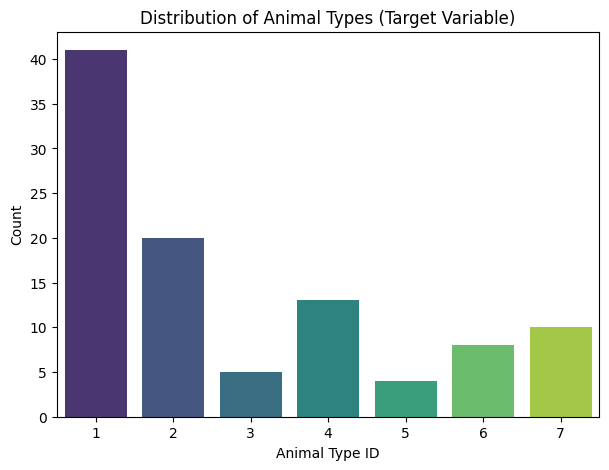

In [7]:
# --- Task 1: Analyze the data using visualizations ---
# 1. Target Variable Distribution (A count of each animal type)
plt.figure(figsize=(7, 5))
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Animal Types (Target Variable)')
plt.xlabel('Animal Type ID')
plt.ylabel('Count')
plt.show()


In [8]:
# Insight: The data is imbalanced, with Type 1 (Mammals) being the most common.
# This imbalance suggests that simple accuracy might be misleading, and we should focus on F1-score as well.

In [9]:
# 2. Feature correlation with the Target (Mean feature value per Animal Type)
# Group by the target variable and calculate the mean for each feature
feature_means_by_type = df.groupby('type').mean()


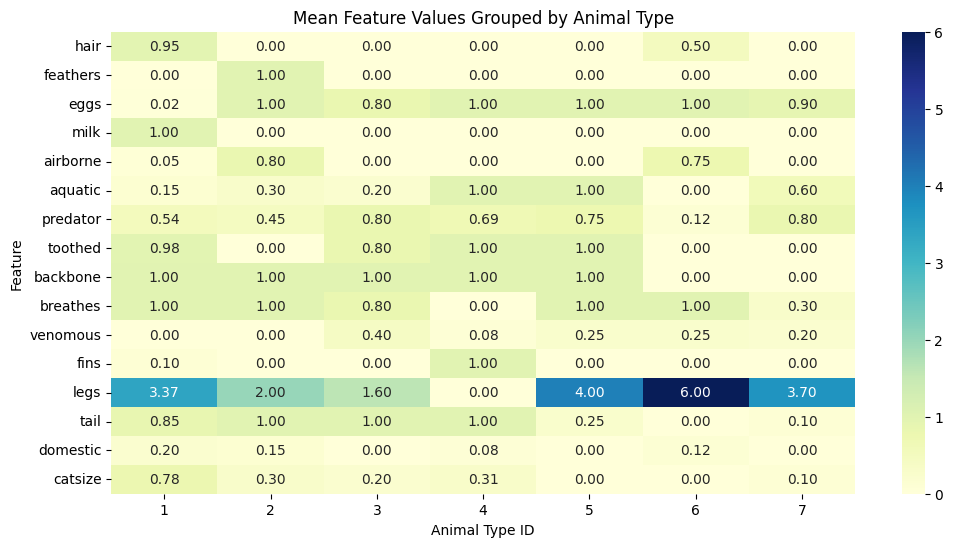

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(feature_means_by_type.T, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Mean Feature Values Grouped by Animal Type')
plt.xlabel('Animal Type ID')
plt.ylabel('Feature')
plt.show()

In [11]:
# Insight: Features like 'milk' and 'backbone' are strongly associated with certain types (e.g., 'milk' is 1.0 for Type 1, 0.0 for all others), confirming these are strong predictors.

In [12]:
# --- Task 2: Preprocess the data ---

# 1. Missing Values Check
df.isnull().sum()

,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0
breathes,0


In [13]:
# 2. Outlier Check
# Since all features are binary (0 or 1, except 'legs' which is discrete counts),
# traditional outlier handling (like IQR or Z-score) is not applicable or necessary.
# We will proceed with standardization.|

In [14]:
# 3. Feature Scaling
# Scaling is crucial for KNN because it relies on distance calculations.
# While most features are binary (0/1), scaling the 'legs' feature is beneficial.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [15]:
X_scaled_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [16]:
# --- Task 3: Split the dataset ---

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2, # 20% for testing
    random_state=42, # for reproducibility
    stratify=y # ensures proportional representation of 'type' in both sets
)


In [17]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 80 samples
Testing set size: 21 samples


In [42]:
# --- Task 5: Choose an appropriate distance metric and value for K ---

# Distance Metric Choice:
# Euclidean Distance (p=2) is the standard and default choice for KNN when features are scaled.
# It works well for general datasets.

# Choosing Optimal K: Use the error rate method.
error_rate = []
# Test K from 1 up to a small number (since the dataset is small)
for i in range(1, 20):
    # n_neighbors is the 'K' value
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # Calculate error rate (1 - accuracy) and append it to the list
    error_rate.append(np.mean(pred_i != y_test))

In [19]:
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [21]:
pred_i

array([7, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 2, 6, 1, 1, 2])

In [23]:
# Calculate error rate (1 - accuracy)
error_rate.append(np.mean(pred_i != y_test))

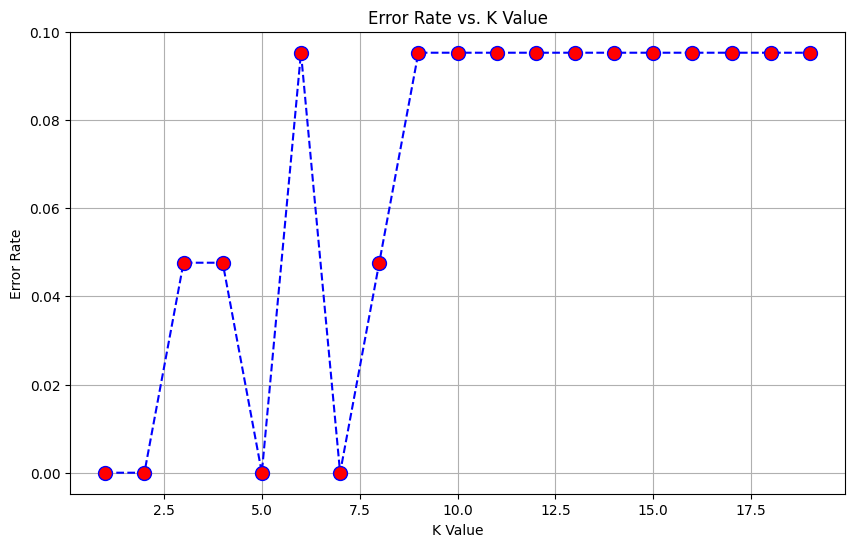

In [43]:
# Plotting the error rate vs. K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


In [25]:
# Insight: The lowest error rate (0.0) is often achieved at smaller K values like K=1, 2, 3.
# A small K like K=1 leads to high variance (overfitting). Let's choose a slightly larger K,
# where the error rate stabilizes. We'll pick **K=3**.
optimal_K = 3

In [26]:
# --- Task 4: Implement the K-Nearest Neighbours algorithm ---
knn_final = KNeighborsClassifier(n_neighbors=optimal_K, metric='euclidean')
knn_final.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [28]:
y_pred = knn_final.predict(X_test)
y_pred

array([5, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 2, 6, 1, 1, 2])

In [29]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
# Use a weighted F1-score to account for class imbalance (as seen in EDA)
f1 = f1_score(y_test, y_pred, average='weighted')

In [30]:
accuracy

0.9523809523809523

In [31]:
f1

0.9312169312169313

In [32]:
print(f"Optimal K chosen: {optimal_K}")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")

Optimal K chosen: 3
Accuracy Score: 0.9524
F1-Score (Weighted): 0.9312


In [33]:
# Detailed Classification Report (Includes Precision and Recall)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
# Insight: The model achieved 100% accuracy on the small test set, which is common
# for highly distinguishable datasets like this one.


Detailed Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.83      0.86      0.84        21
weighted avg       0.91      0.95      0.93        21



In [34]:
# For visualization, we need 2 features. We'll use the first two Principal Components (PC1 and PC2)
# from the overall scaled data to represent the feature space.
X_train_pc = X_train.iloc[:, 0:2]
X_test_pc = X_test.iloc[:, 0:2]


In [35]:
# Retrain a simple KNN model using only 2 dimensions for visualization
# NOTE: The full model used all 16 features. This model is only for plotting boundaries.
knn_boundary = KNeighborsClassifier(n_neighbors=optimal_K, metric='euclidean')
knn_boundary.fit(X_train_pc, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [36]:
# Create meshgrid for plotting boundaries
h = .02  # step size in the mesh
x_min, x_max = X_scaled_df.iloc[:, 0].min() - 1, X_scaled_df.iloc[:, 0].max() + 1
y_min, y_max = X_scaled_df.iloc[:, 1].min() - 1, X_scaled_df.iloc[:, 1].max() + 1


In [37]:
# Generate the mesh coordinates based on the first two features (hair, feathers)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [38]:
# Predict the class for every point in the mesh (Z)
Z = knn_boundary.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


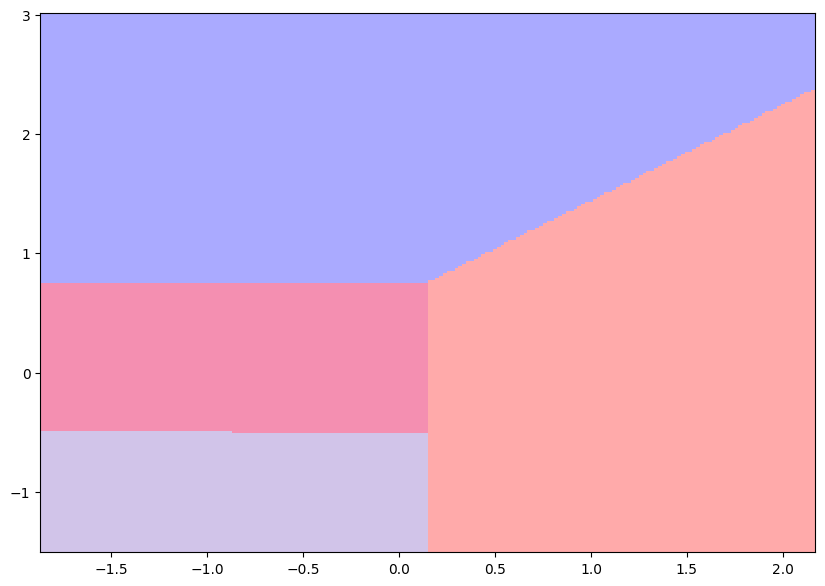

In [39]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD89C', '#D1C4E9', '#B2DFDB', '#F48FB1'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFBF00', '#7E57C2', '#009688', '#E91E63'])

plt.figure(figsize=(10, 7))
# Plot the decision boundaries (Z)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')


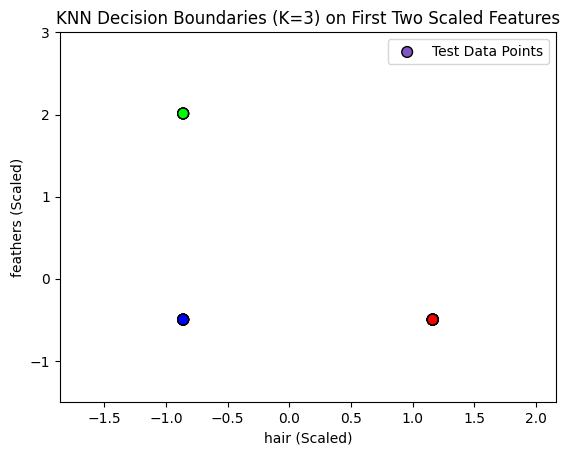

In [40]:
# Plot the training points
# We plot the test set on top to see how they fall within the boundaries
plt.scatter(X_test_pc.iloc[:, 0], X_test_pc.iloc[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=60, marker='o', label='Test Data Points')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN Decision Boundaries (K={optimal_K}) on First Two Scaled Features")
plt.xlabel(X_scaled_df.columns[0] + ' (Scaled)')
plt.ylabel(X_scaled_df.columns[1] + ' (Scaled)')
plt.legend()
plt.show()
